# A2 Q5

In [1]:
import numpy as np
from dataset import *
from mat import *
from copy import deepcopy
import matplotlib.pyplot as plt

np.random.seed(2025) #For reproducibility purposes

%load_ext autoreload
%autoreload 2

# Q5 Try your code

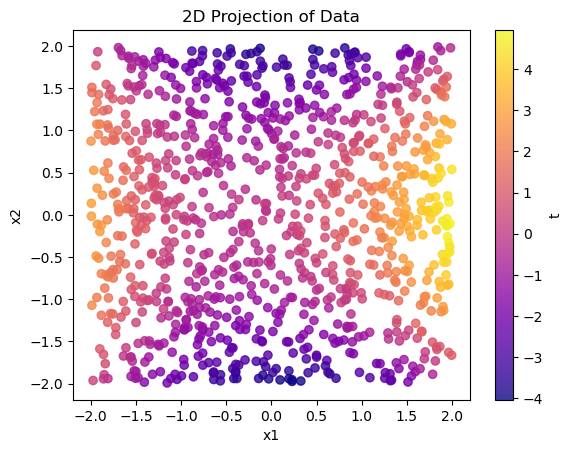

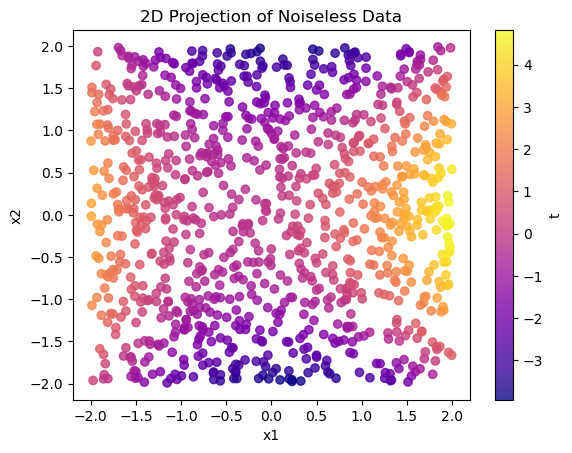

In [2]:
dataset = Dataset(n_samples=1000, x1_range=(-2, 2), x2_range=(-2, 2), noise_std=0.1)
dataset.generate()
dataset.plot()

# Q5 (a)

##  Create a network

In [3]:
# Create a network object
net = Network()

# Add layers using
#  net.add_layer(...)
net.add_layer(Connection(2,8))
net.add_layer(ReLU())
net.add_layer(Connection(8,8))
net.add_layer(ReLU())
net.add_layer(Connection(8,8))
net.add_layer(ReLU())
net.add_layer(Connection(8,8))
net.add_layer(ReLU())
net.add_layer(Connection(8,8))
net.add_layer(ReLU())
net.add_layer(Connection(8,1))

# Then choose a loss function by setting net.loss
net.loss = MSE()



## Train the network

0: cost = 3.753682583566693
50: cost = 3.11318092332724
100: cost = 2.5882914132895545
150: cost = 1.4790796043101007
200: cost = 0.7116197523828635
250: cost = 0.40991303453366085
300: cost = 0.24389386379179667
350: cost = 0.175025275160845
400: cost = 0.13961595587888506
450: cost = 0.12039713404107448
500: cost = 0.1060541813575886
550: cost = 0.1456378127515402
600: cost = 0.08335618908036187
650: cost = 0.06805311751268014
700: cost = 0.06115493591898257
750: cost = 0.06173461145918053
800: cost = 0.05272480858311359
850: cost = 0.056508595711071065
900: cost = 0.04805322995099442
950: cost = 0.04887540640549687
1000: cost = 0.04639693838030773
1050: cost = 0.047840533534676245
1100: cost = 0.04640112588772364
1150: cost = 0.04490098580996825
1200: cost = 0.04434674229196418
1250: cost = 0.04332589737921198
1300: cost = 0.04205190470884954
1350: cost = 0.040947391696384394
1400: cost = 0.03802270809474974
1450: cost = 0.03760102292782275
1500: cost = 0.036706315338093876
1550: co

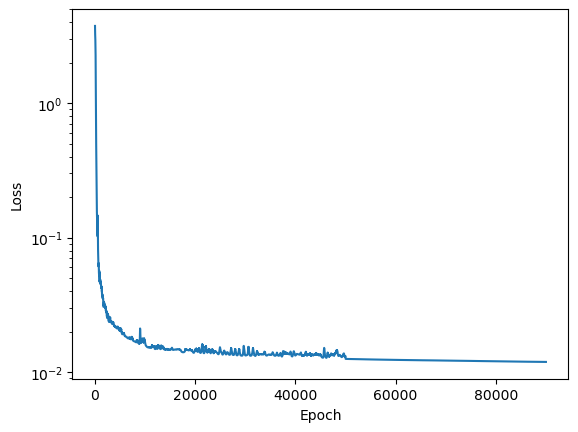

In [4]:
# Call net.learn, and plot the learning curve (loss vs epochs)

net.learn(dataset, lrate=0.01, epochs=50000)
net.learn(dataset, lrate=0.005, epochs=40000)
plt.semilogy(net.loss_history); plt.xlabel('Epoch'); plt.ylabel('Loss');

In [5]:

y = net(dataset.inputs())

# Q5 (b) Model's training metrics

In [6]:
def compute_metrics(t_true, y_pred):
    """
    Compute regression metrics for model evaluation.
    
    Parameters:
    - t_true: numpy array of true target values.
    - y_pred: numpy array of predicted values.
    
    Returns:
    - metrics: dict with R^2, and mse.
    """
        

    #===== YOUR CODE Here =====
    # implement R^2 and MSE
    t_mean = np.mean(t_true)
    ss_total = np.sum((t_true - t_mean) ** 2)
    ss_residual = np.sum((t_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)

    mse = np.sum((y_pred - t_true) ** 2) / (2 * len(t_true))
    #==========================

    return {
        'R^2': r2,
        'MSE': mse
    }

noiseless_targets = dataset.noiseless_data["t"].to_numpy().reshape(-1, 1)
metrics = compute_metrics(noiseless_targets, y())

print(metrics)


{'R^2': 0.9991147213450977, 'MSE': 0.0014908143893197778}


# Q5 (c) Model's metrics on noisy and noisless data

In [7]:

#implement_metrics_with_respect_noisy_data_here and provide your conclusion in the comments or using Markdown
noisy_targets = dataset.data["t"].to_numpy().reshape(-1, 1)
metrics = compute_metrics(noisy_targets, y())

print(metrics)

{'R^2': 0.9965053318833542, 'MSE': 0.005940536605135895}


R² Decrease: The drop from noiseless to noisy shows that the model is still able to explain a significant portion of the variance in the noisy dataset, but the noise has caused a reduction in predictive accuracy. This is a small decrease, indicating that the model is still quite robust in handling the noise.

MSE Increase: The increase in MSE reflects that the predictions are more distant from the actual target values due to the noise. While the increase is noticeable, it is not drastic, suggesting that the model is still relatively effective despite the noise.